In [2]:
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
import scipy.linalg as linalg

In [3]:
x = np.genfromtxt("hw09_data_set.csv",delimiter = ",")

In [4]:
N = x.shape[0]
threshold = 2

In [5]:
B = (sp.distance_matrix(x,x) < threshold).astype(int)
for i in range(N):
    B[i][i] = 0

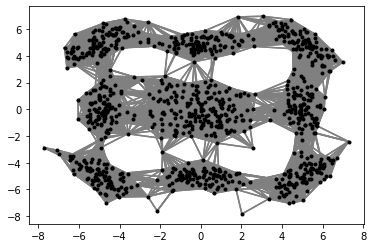

In [177]:
conn1,conn2 = np.where(B == 1)
for i in range(len(conn1)):
    x_values = np.vstack([x[conn1[i],0],x[conn2[i],0]])
    y_values = np.vstack([x[conn1[i],1],x[conn2[i],1]])
    
    plt.plot(x_values,y_values,color = "gray")
plt.plot(x[:,0],x[:,1],".",color = "black")


In [6]:
D = np.zeros((B.shape[0],B.shape[1]))
for i in range(N):
    D[i][i] = np.sum(B[i])
    

In [7]:
D

array([[ 73.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  42.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  84., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  75.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  83.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 124.]])

In [179]:
D_inverse = linalg.cho_solve(linalg.cho_factor(D),np.eye(N))
Laplacian = np.eye(N) - np.matmul(np.matmul(np.sqrt(D_inverse),B),np.sqrt(D_inverse))

In [180]:
Laplacian[0:5,0:5]

array([[ 1.        ,  0.        , -0.01277024, -0.01689343, -0.01277024],
       [ 0.        ,  1.        , -0.01683588,  0.        ,  0.        ],
       [-0.01277024, -0.01683588,  1.        ,  0.        , -0.01190476],
       [-0.01689343,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.01277024,  0.        , -0.01190476,  0.        ,  1.        ]])

In [181]:
R = 5
values,vectors = np.linalg.eig(Laplacian)
values = np.real(values)
vectors = np.real(vectors)

Z = np.vstack([vectors[:,np.argsort(values)[i]] for i in range(1,R + 1)]).T
centr_args =  [242, 528, 570, 590, 648, 667, 774, 891,955] 

centroids = np.vstack([Z[i] for i in centr_args])
K = centroids.shape[0]

In [196]:
Z[0:5,0:5]

array([[ 0.02492986, -0.03008423, -0.00946604,  0.05116243,  0.0229564 ],
       [ 0.01590745, -0.02367529, -0.00235798,  0.037579  ,  0.0141235 ],
       [ 0.02601003, -0.03273215, -0.00886993,  0.05526008,  0.02411414],
       [ 0.02147879, -0.02190107, -0.01054254,  0.03633024,  0.0175098 ],
       [ 0.02624211, -0.03262591, -0.00925994,  0.05524827,  0.02432336]])

In [182]:
def e_step(centroids,Z):
    memberships = np.zeros((N,K))
    cent_labels = np.argmin(sp.distance_matrix(Z,centroids),axis = 1)
    for i in range(len(cent_labels)):
        memberships[i][cent_labels[i]] = 1

    return memberships

def m_step(memberships):
    centroids = np.concatenate([np.mean(Z[np.argwhere(memberships==1)[:,1] == k],axis =0).reshape(1,5) for k in range(K)])
    return centroids
    
    

In [183]:
clusters = np.argwhere(membership == 1)[:,1]
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

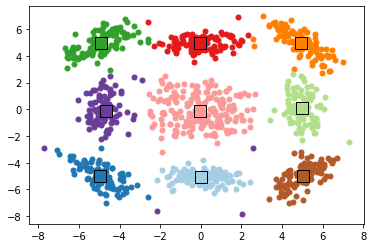

In [195]:
for c in range(K):
            
            plt.plot(x[clusters == c, 0], x[clusters == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
            plt.plot(np.mean(x[clusters == c,0]),np.mean(x[clusters ==c,1 ]),"s",markersize = 12,markerfacecolor = cluster_colors[c],markeredgecolor = "black")
            